<a href="https://colab.research.google.com/github/FarabiHossain/SUICIDE-ATTEMPT-PREDICTION-RATE-ANALYSIS-BASED-ON-THE-MACHINE-LEARNING-APPROACH-/blob/main/suicideAttemptPredictionpaperCode_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dill
dill.dump_session('notebook_env.db')
#dill.load_session('notebook_env.db')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
dataset = pd.read_csv('foreveralone.csv', parse_dates=['time'], date_parser=d_parser)

In [ ]:
dataset.attempt_suicide.value_counts()

No     384
Yes     85
Name: attempt_suicide, dtype: int64

In [ ]:
#dataset.describe(include='all')

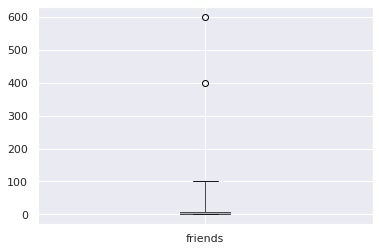

In [ ]:
fig, ax = plt.subplots()
# ax.set_ylim(0, 105)
# whiskers on 0.3 and 99.7 percentile to determine outliers
dataset.boxplot(column='friends', ax=ax, whis=[0.3,99.7])

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

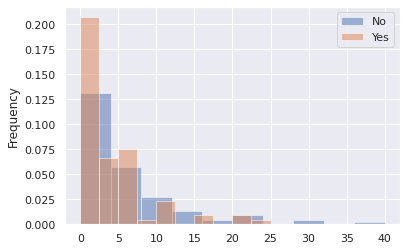

In [ ]:
dataset.loc[dataset['friends'] <= 50,:] \
        .groupby('attempt_suicide')['friends'] \
        .plot.hist(legend=True, density=True, alpha = 0.5)

social_fear
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

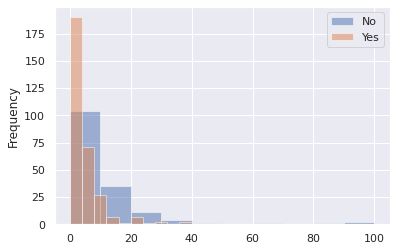

In [ ]:
dataset = dataset[dataset['friends'] < dataset['friends'].quantile(0.997)]
dataset.groupby('social_fear')['friends'].plot.hist(legend=True, alpha = 0.5)

In [ ]:
dataset.groupby('social_fear')['friends'].max()

social_fear
No     100.0
Yes     40.0
Name: friends, dtype: float64

In [ ]:
dataset['improve_yourself_how'].head(15)

0                                                  None
1                      join clubs/socual clubs/meet ups
2                                        Other exercise
3                            Joined a gym/go to the gym
4                                                  None
5     Joined a gym/go to the gym, join clubs/socual ...
6                                                  None
7     Therapy, join clubs/socual clubs/meet ups, Non...
8                   Joined a gym/go to the gym, Therapy
9                                               Therapy
10     Other exercise, join clubs/socual clubs/meet ups
11           Joined a gym/go to the gym, Other exercise
12    Joined a gym/go to the gym, Therapy, join club...
13                                                 None
14    Cosmetic survey, Joined a gym/go to the gym, T...
Name: improve_yourself_how, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_improves, dtype: object

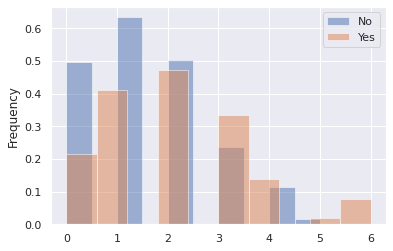

In [ ]:
dataset['improve_yourself_how'] = dataset['improve_yourself_how'].str.lower()
# none isn't an improvment, so we don't need to count it
dataset['total_improves'] = dataset['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'none']))
dataset.groupby('attempt_suicide')['total_improves'].plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
improvements = dataset['improve_yourself_how'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
improvements = improvements.str.strip()
top_improvements = improvements.value_counts()
top_improvements

other exercise                                                                                                                               195
joined a gym/go to the gym                                                                                                                   190
join clubs/socual clubs/meet ups                                                                                                             142
therapy                                                                                                                                      130
none                                                                                                                                         113
cosmetic survey                                                                                                                               17
medication                                                                                                                        

In [ ]:
top_improvements = top_improvements[top_improvements > 5]

In [ ]:
for imp in top_improvements.index:
    dataset['[improve] {}'.format(imp)] = dataset['improve_yourself_how'].str.contains(imp, regex=False)

In [ ]:
col = {x:'sum' for x in dataset.columns if '[improve]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey
attempt_suicide,,,,,,
No,0.246753,0.250000,0.181818,0.141234,0.159091,0.021104
Yes,0.251462,0.210526,0.175439,0.251462,0.087719,0.023392


attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_help, dtype: object

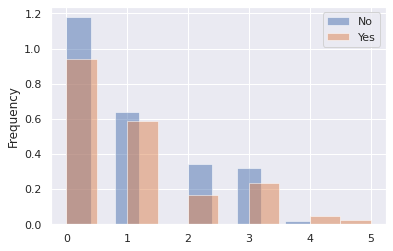

In [ ]:
dataset['what_help_from_others'] = dataset['what_help_from_others'].str.lower()
dataset['total_help'] = dataset['what_help_from_others'].str.split(',').apply(lambda x: len([i for i in x if i != "i don't want help"]))
dataset.groupby('attempt_suicide')['total_help'].plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
help_from_others = dataset['what_help_from_others'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
help_from_others = help_from_others.str.strip()

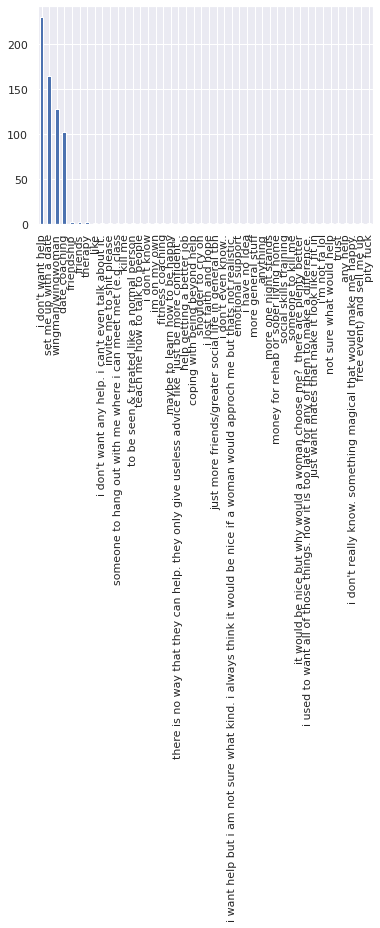

In [ ]:
top_help_from_others = help_from_others.value_counts()
top_help_from_others.plot(kind='bar')

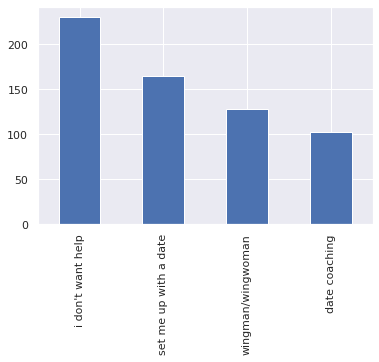

In [ ]:
top_help_from_others = top_help_from_others[top_help_from_others > 5]
top_help_from_others.plot(kind='bar')

In [ ]:
for hlp in top_help_from_others.index:
    dataset['[help] {}'.format(hlp)] = dataset['what_help_from_others'].str.contains(hlp, regex=False)

In [ ]:
col = {x:'sum' for x in dataset.columns if '[help]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
attempt_suicide,,,,
No,0.363636,0.270793,0.206963,0.158607
Yes,0.392523,0.224299,0.196262,0.186916


In [ ]:
job_dataset = dataset.loc[:,('job_title', 'employment', 'edu_level')].applymap(lambda x: x.strip().lower() if type(x) == str else x)
job_dataset[pd.isna(job_dataset['job_title'])]

,job_title,employment,edu_level
30,NaN,a student,"some high school, no diploma"
54,NaN,a student,"high school graduate, diploma or the equivalen..."
55,NaN,out of work but not currently looking for work,"some college, no degree"
126,NaN,out of work but not currently looking for work,"some college, no degree"
130,NaN,out of work but not currently looking for work,"some college, no degree"
166,NaN,out of work but not currently looking for work,"some college, no degree"
170,NaN,out of work but not currently looking for work,associate degree
283,NaN,a student,"some college, no degree"
352,NaN,out of work and looking for work,"high school graduate, diploma or the equivalen..."
371,NaN,a student,"some high school, no diploma"


In [ ]:
job_dataset['job_title'].value_counts()

student                82
none                   31
unemployed             15
engineer               12
software developer      7
                       ..
terminal worker         1
assistant caretaker     1
popo                    1
u serious?              1
customer service        1
Name: job_title, Length: 239, dtype: int64

In [ ]:
dataset.shape


(467, 31)

In [ ]:
dataset = dataset.drop(['what_help_from_others', 'improve_yourself_how', 'job_title','time','race', 
                        'bodyweight', 'virgin','pay_for_sex','prostitution_legal'], axis=1)

In [ ]:
dataset.columns

Index(['gender', 'sexuallity', 'age', 'income', 'friends', 'social_fear',
       'depressed', 'attempt_suicide', 'employment', 'edu_level',
       'total_improves', '[improve] other exercise',
       '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching'],
      dtype='object')

In [ ]:
new_income = []
for c in dataset['income']:
    print(c.strip('$').split(' ')[0].replace(',','.'))
    new_income.append(float(c.strip('$').split(' ')[0].replace(',','.')))

30.000
1
0
1
30.000
50.000
1
20.000
10.000
50.000
50.000
1
1
0
30.000
0
1
1
1
75.000
10.000
1
0
1
20.000
0
20.000
0
0
1
0
1
0
10.000
20.000
0
75.000
30.000
0
0
1
20.000
75.000
0
10.000
20.000
20.000
0
0
150.000
1
1
30.000
10.000
0
0
10.000
20.000
0
1
20.000
1
20.000
1
1
10.000
0
1
0
20.000
1
10.000
0
50.000
20.000
50.000
0
30.000
10.000
1
125.000
30.000
1
1
0
0
20.000
1
30.000
20.000
30.000
10.000
30.000
20.000
0
20.000
1
20.000
0
1
1
0
0
0
50.000
100.000
0
20.000
10.000
0
10.000
30.000
30.000
0
0
20.000
1
0
10.000
75.000
20.000
1
1
0
0
10.000
0
1
174.999
20.000
50.000
1
150.000
1
10.000
0
40.000
30.000
1
200.000
10.000
50.000
1
10.000
40.000
0
75.000
0
0
1
174.999
1
125.000
50.000
1
0
0
0
20.000
30.000
0
0
10.000
75.000
50.000
40.000
0
75.000
0
10.000
0
20.000
10.000
1
1
0
1
50.000
1
30.000
30.000
0
30.000
10.000
10.000
0
0
0
1
0
125.000
0
50.000
0
10.000
0
1
40.000
1
1
10.000
0
0
0
0
10.000
1
125.000
1
0
1
0
1
1
30.000
20.000
10.000
1
20.000
1
50.000
30.000
1
1
1
50.000
1
0
0
0
20.00

In [ ]:
dataset['income_process'] = new_income
dataset = dataset.drop(labels=['income'],axis=1)

In [ ]:
def preprocess(col):
    cols= list(dict(dataset[col].value_counts()).keys())
    vals= []
    for i in range(len(cols)):
        vals.append(i)
    val_dict = dict((key,val) for key,val in zip(cols,vals))
    dataset[col] = dataset[col].map(val_dict)

In [ ]:
for col in dataset.columns:
  preprocess(col)

In [ ]:
dataset.head()

,gender,sexuallity,age,friends,social_fear,depressed,attempt_suicide,employment,edu_level,total_improves,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey,total_help,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching,income_process
0,0,0,15,0,0,0,1,1,5,2,0,0,0,0,1,0,3,0,1,1,0,4
1,0,1,1,0,0,0,0,3,0,0,0,0,1,0,0,0,2,0,1,1,1,1
2,0,0,2,5,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,6,10,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
4,0,0,0,5,1,0,0,1,2,2,0,0,0,0,1,0,0,1,0,0,0,4


In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

dataset.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in dataset.columns.values]
X = dataset.drop(labels=['attempt_suicide'],axis=1)
y = dataset['attempt_suicide']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)


In [ ]:
"""from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)
#"X_test_smote,y_test_smote = smote.fit_sample(,y_test)

from collections import Counter
print("Before smote --",Counter(y_train))
print("Before smote --",Counter(y_train_smote))
print(X_train_smote.shape)
#X_test = X_test.astype('float')
#print(np.array(X_train_smote))"""

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=10)\nX_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)\n#"X_test_smote,y_test_smote = smote.fit_sample(,y_test)\n\nfrom collections import Counter\nprint("Before smote --",Counter(y_train))\nprint("Before smote --",Counter(y_train_smote))\nprint(X_train_smote.shape)\n#X_test = X_test.astype(\'float\')\n#print(np.array(X_train_smote))'

In [ ]:
#import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
X_train_smote,y_train_smote = ros.fit_sample(X_train,y_train)
from collections import Counter
print("Before smote --",Counter(y_train))
print("Before smote --",Counter(y_train_smote))

Before smote -- Counter({0: 298, 1: 75})
Before smote -- Counter({0: 298, 1: 298})


In [ ]:
from xgboost import  XGBClassifier 
"""84.04model = XGBClassifier(max_depth=15,subsample=0.9,n_estimators=400,
                      learning_rate=0.025,min_child_weight=0.6,random_state = 10)
#model = XGBClassifier(learning_rate=0.01, max_depth= 15, min_child_weight = 0.7, 
                      #n_estimators=100, random_state= 10, subsample = 0.7)"""
"""model = XGBClassifier(max_depth=20,subsample=0.9,n_estimators=400,
                      learning_rate=0.025,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=1, 
                      colsample_bytree = 0.5) 86 balanced"""

model = XGBClassifier(max_depth=12,subsample=0.74,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)
model.fit(X_train_smote,y_train_smote)
#X_test = X_test[X_train_smote.dtype.names]
y_predict = model.predict(X_test.values)
#y_train_predict = model.predict(X_train_smote)
xgbyproba = model.predict_proba(X_test.values)[::,1]

from sklearn.metrics import accuracy_score
print("test - result",accuracy_score(y_test,y_predict))
#print("Train- Result",accuracy_score(y_train,y_train_predict))


test - result 0.8936170212765957


roc_auc_score 0.7785714285714287


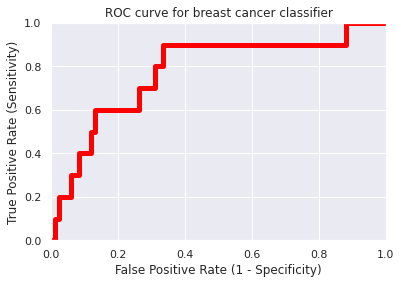

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
xgbt_fpr, xgbt_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test.values)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test.values)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(xgbt_fpr, xgbt_tpr,color='red',lw=5)
plt.show()

In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0,0.7],
    'learning_rate': [0.01, 0.02,0.05],
    'min_child_weight': [0.7, 0.8,0.6],
    'random_state': [5, 10,105]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train_smote, y_train_smote)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  XGBClassifier()\nparameters = {\n    \'n_estimators\': [100, 250, 500],\n    \'max_depth\': [6, 9, 12],\n    \'subsample\': [0.9, 1.0,0.7],\n    \'learning_rate\': [0.01, 0.02,0.05],\n    \'min_child_weight\': [0.7, 0.8,0.6],\n    \'random_state\': [5, 10,105]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train_smote, y_train_smote)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[82  2]
 [ 8  2]]


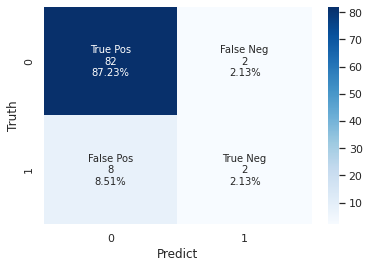

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        84
           1       0.50      0.20      0.29        10

    accuracy                           0.89        94
   macro avg       0.71      0.59      0.61        94
weighted avg       0.87      0.89      0.87        94



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test.values, y_predict)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test.values,y_predict))

In [ ]:
"""from sklearn.metrics import roc_curve, auc
#import scikitplot.metrics as skplt
#print(y_pred_svm)
xgbt_fpr, xgbt_tpr, threshold = roc_curve(y_test, y_predict)
#print(svm_fpr)
auc_svm = auc(xg_fpr, xg_tpr)
#skplt.plot_roc (Y_test, preds)
plt.show()
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xg_fpr, xg_tpr, marker='.')
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()"""

"from sklearn.metrics import roc_curve, auc\n#import scikitplot.metrics as skplt\n#print(y_pred_svm)\nxgbt_fpr, xgbt_tpr, threshold = roc_curve(y_test, y_predict)\n#print(svm_fpr)\nauc_svm = auc(xg_fpr, xg_tpr)\n#skplt.plot_roc (Y_test, preds)\nplt.show()\nplt.figure(figsize=(5, 5), dpi=100)\nplt.plot(xg_fpr, xg_tpr, marker='.')\n#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)\n\nplt.xlabel('False Positive Rate -->')\nplt.ylabel('True Positive Rate -->')\n\nplt.legend()\n\nplt.show()"

Test Accuracy: 86.17%


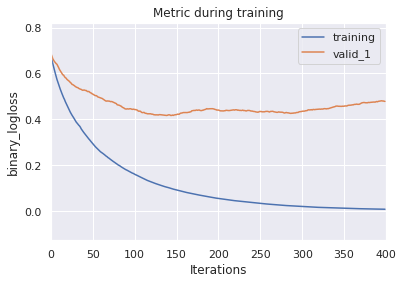

In [ ]:
import lightgbm as lgb
#X_train_smote y_train_smote
eval_set = [(X_train_smote,y_train_smote), (X_test, y_test)]

"""model = lgb.LGBMClassifier(learning_rate=0.025,n_estimators=400,
                           random_state=100,max_depth= 5,max_bin = 200,
                           num_leaves = 25,min_child_weight=0.7)"""

"""model = lgb.LGBMClassifier(learning_rate=0.025,n_estimators= 400,
                          random_state=5,max_depth= 5,max_bin = 200,
                           num_leaves = 10,min_child_weight=0.6)
"bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 6,

"""
"""model = lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=5,max_depth= 5,max_bin = 100,
                           num_leaves = 15,min_child_weight=0.7) 84"""

model = lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=42,max_depth= 10,max_bin = 100,
                           num_leaves = 25,min_child_weight=0.2,
                           feature_fraction = 0.9,) 
model.fit(X_train_smote, y_train_smote,eval_set=eval_set, verbose= False)
lgb.plot_metric(model)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#y_train_predict = model.predict(X_train)
y_preds = model.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#ac = accuracy_score(y_train, y_train_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
#print("Train Accuracy: %.2f%%" % (ac * 100.0))

roc_auc_score 0.7476190476190476


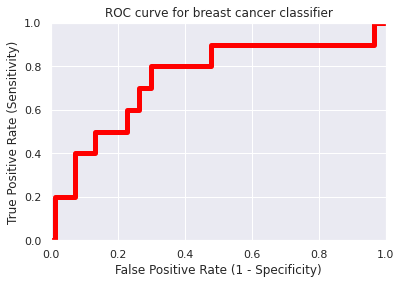

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  lgb.LGBMClassifier()
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 9, 12],
    'max_bin': [200, 50,100],
    'learning_rate': [0.01, 0.025,0.05],
    'min_child_weight': [0.7, 0.8,0.6],
    'random_state': [5, 10,30],
    'num_leaves': [25, 10,30]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  lgb.LGBMClassifier()\nparameters = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [6, 9, 12],\n    \'max_bin\': [200, 50,100],\n    \'learning_rate\': [0.01, 0.025,0.05],\n    \'min_child_weight\': [0.7, 0.8,0.6],\n    \'random_state\': [5, 10,30],\n    \'num_leaves\': [25, 10,30]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train, y_train)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[77  7]
 [ 6  4]]


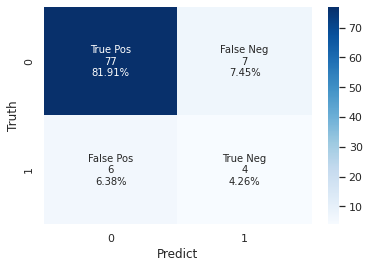

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        84
           1       0.36      0.40      0.38        10

    accuracy                           0.86        94
   macro avg       0.65      0.66      0.65        94
weighted avg       0.87      0.86      0.86        94



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,predictions))

In [ ]:
from sklearn import svm
#X_train_smote y_train_smote
from sklearn.metrics import plot_confusion_matrix
"""svc = svm.SVC(C=300, kernel="rbf", probability=True,
              random_state=100,gamma=0.5, tol=0.6,max_iter= 1000)"""

svc = svm.SVC(C=3, kernel="rbf",
              random_state=5,gamma=0.08, tol=0.06,max_iter= 400,probability=True)

clf=svc.fit(X_train_smote, y_train_smote)
#y_pred_svm = svc.predict(X_test)


y_pred_svm  = svc.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
pd.crosstab(y_test,y_pred_svm)
Xg = svc.predict_proba(X_test)[0]
thr3=np.where(svc.predict_proba(X_test)[:,1]>0.7,1,0)
pd.crosstab(y_test,y_pred_svm)


Accuracy: 84.04%


col_0,0,1
attempt_suicide,,
0,75,9
1,6,4


roc_auc_score 0.7047619047619048


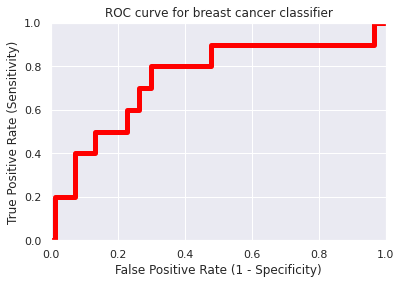

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fprv, tprv, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1],drop_intermediate=False)
aucv = roc_auc_score(y_test,svc.predict_proba(X_test)[:,1])
print("roc_auc_score",aucv)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

[[75  9]
 [ 6  4]]


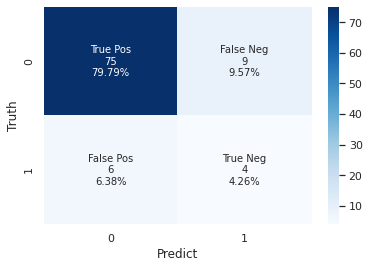

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        84
           1       0.31      0.40      0.35        10

    accuracy                           0.84        94
   macro avg       0.62      0.65      0.63        94
weighted avg       0.86      0.84      0.85        94



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,y_pred_svm))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#X_train_smote y_train_smote
"""model = RandomForestClassifier(n_estimators = 100,max_depth=7
                               ,random_state=5)"""

"""model = RandomForestClassifier(n_estimators = 100,max_depth=6
                               ,random_state=30)"""

"""model = RandomForestClassifier(n_estimators = 300,max_depth=7
                               ,random_state=10,verbose=0)for imbalance"""
model = RandomForestClassifier(n_estimators = 400,max_depth=20
                               ,random_state=5)

model.fit(X_train_smote,y_train_smote)
pre = model.predict(X_test)
from sklearn import metrics
predictions = [round(value) for value in pre]
accuracy = accuracy_score(y_test, predictions)
y_preds = model.predict_proba(X_test)[:,1]

# take the second column because the classifier outputs scores for
# the 0 class as well
#preds = y_preds[:,1]
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.11%


In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  RandomForestClassifier()
parameters = {
    'n_estimators': [100, 200, 400],
    'max_depth': [7, 14, 21],
    'random_state': [5, 10,25]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  RandomForestClassifier()\nparameters = {\n    \'n_estimators\': [100, 200, 400],\n    \'max_depth\': [7, 14, 21],\n    \'random_state\': [5, 10,25]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train, y_train)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[77  7]
 [ 7  3]]


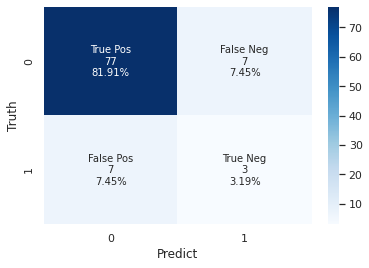

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        84
           1       0.30      0.30      0.30        10

    accuracy                           0.85        94
   macro avg       0.61      0.61      0.61        94
weighted avg       0.85      0.85      0.85        94



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, pre)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,pre))

roc_auc_score 0.7267857142857143


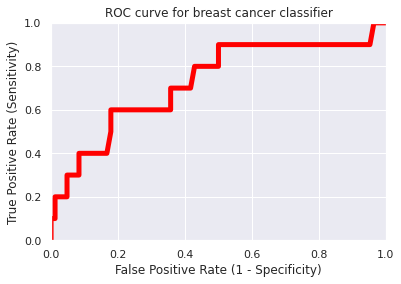

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

0.7047619047619048
xxxx
xxxx
xxxx
xxxx


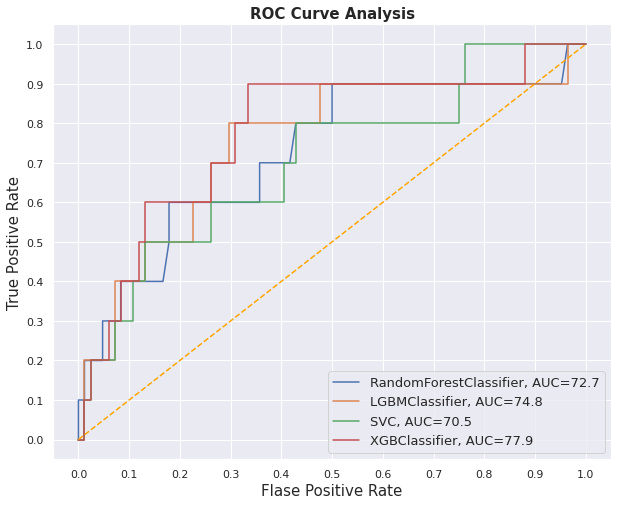

In [ ]:
# Instantiate the classfiers and make a list
"""xgbmodel =  XGBClassifier(max_depth=12,subsample=0.7,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)"""
from sklearn import svm
rfmodel = RandomForestClassifier(n_estimators = 400,max_depth=20
                               ,random_state=5)

lgbmodel =  lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=42,max_depth= 10,max_bin = 100,
                           num_leaves = 25,min_child_weight=0.2,
                           feature_fraction = 0.9,) 

classifiers = [rfmodel,lgbmodel]
"""classifiers = [xgb.XGBClassifier(), 
               RandomForestClassifier(n_estimators = 20), 
               svm.SVC(), 
               lgb.LGBMClassifier()]"""

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    #print("fdsfdf")
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test)[::,1]
    
    #fpr, tpr, _ = roc_curve(y_test,  yproba)
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


# Set name of the classifiers as index labels
svm = svm.SVC(C=10, kernel="rbf",
              random_state=42,gamma=0.1, tol=0.01,max_iter= 100000,probability=True)
print(aucv)
result_table = result_table.append({'classifiers':svm.__class__.__name__,
                                        'fpr':fprv, 
                                        'tpr':tprv, 
                                        'auc':aucv}, ignore_index=True)

#xgb
xgbmodel =  XGBClassifier(max_depth=12,subsample=0.7,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)
aucxgb = roc_auc_score(y_test, xgbyproba)
result_table = result_table.append({'classifiers':xgbmodel.__class__.__name__,
                                        'fpr':xgbt_fpr, 
                                        'tpr':xgbt_tpr, 
                                        'auc':aucxgb}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

#print(result_table.count)
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    print("xxxx")
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.1f}".format(i, result_table.loc[i]['auc']*100))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
